# Isomap - Isometric Mapping (ou Mapeamento Isométrico)

## O que é ?

- Método não linear de redução de dimensionalidade

- Extensão do MSD (Multidimensional Scaling ou Escalonamento Multidimensional)

- Estrutura de grafo com distâncias geodésicas (arestas ponderadas)

## Conjunto de dados Curva S

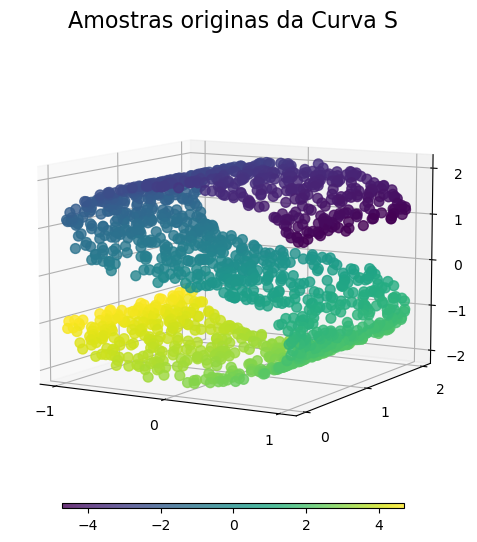

In [19]:
import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
from matplotlib import ticker

from sklearn import datasets, manifold


n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=0)

def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())
    
plot_3d(S_points, S_color, "Amostras originas da Curva S")

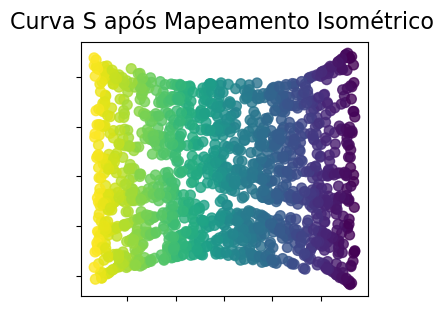

In [26]:
n_neighbors = 12  # neighborhood which is used to recover the locally linear structure
n_components = 2  # number of coordinates for the manifold
params = {
    "n_neighbors": n_neighbors,
    "n_components": n_components,
    "eigen_solver": "auto",
    "random_state": 0,
}

isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components, p=1)
S_isomap = isomap.fit_transform(S_points)

plot_2d(S_isomap, S_color, "Curva S após Mapeamento Isométrico")

O algoritmo Isomap é uma técnica de aprendizado não supervisionado utilizada principalmente para redução de dimensionalidade e análise de dados de alta dimensão. Ele foi desenvolvido para preservar as relações de distância entre pontos em um espaço de dados, mesmo quando esses pontos são representados em uma dimensão menor.

O Isomap funciona mapeando os dados em uma estrutura de grafo, onde cada ponto de dados é representado como um nó e as relações de proximidade entre esses pontos são representadas por arestas ponderadas. Em seguida, o algoritmo calcula as distâncias geodésicas, ou seja, as distâncias ao longo das arestas do grafo, em vez de simplesmente medir as distâncias euclidianas diretas entre os pontos. Isso é feito usando técnicas de álgebra linear, como a técnica de árvore de mínima expansão.

O Isomap é útil para lidar com conjuntos de dados que possuem estruturas intrínsecas de alta dimensionalidade e podem estar em formas não lineares. Ele tenta capturar as estruturas globais e locais dos dados, preservando a informação sobre as relações de distância entre os pontos, o que pode ser valioso em diversas aplicações, como análise de imagens, reconhecimento de padrões e processamento de sinais.

## Aplicações

O algoritmo Isomap é utilizado principalmente para lidar com problemas onde é crucial lidar com dados de alta dimensionalidade. Algumas das principais aplicações são:

- Análise de Imagens e Visão Computacional

Isomap pode ser usado para análise de imagens, especialmente na redução de dimensionalidade de conjuntos de dados de imagens. Isso é útil para reconhecimento de padrões, segmentação de imagens e até mesmo para a compressão de imagens.

- Processamento de Sinais

Em processamento de sinais, o Isomap pode ajudar na identificação de padrões complexos em séries temporais de dados. Isso pode ser aplicado em diversas áreas, como análise de séries temporais financeiras, processamento de sinais biomédicos e reconhecimento de padrões em sinais complexos.

- Reconhecimento de Padrões e Aprendizado de Máquina

No campo do aprendizado de máquina, o Isomap é utilizado para redução de dimensionalidade antes de aplicar algoritmos de classificação ou regressão. Ele ajuda a simplificar e visualizar dados complexos, melhorando o desempenho de muitos modelos de machine learning.

- Bioinformática

Na bioinformática, o Isomap é empregado para análise de dados genômicos, proteômicos e de expressão gênica. Ajuda na compreensão das relações entre diferentes componentes biológicos em um espaço dimensional reduzido.

- Robótica e Processamento de Movimento

Em robótica e análise de movimento, o Isomap pode ser utilizado para entender e representar movimentos complexos, auxiliando na identificação de padrões e na criação de modelos de movimento mais eficientes.

- Visualização de Dados e Análise Exploratória

O Isomap é frequentemente empregado na visualização de dados para explorar e compreender a estrutura subjacente de conjuntos de dados de alta dimensão. Isso é valioso para encontrar relacionamentos não lineares e clusters em dados complexos.

## Vantagens 

### Preservação de Estruturas Não Lineares
O Isomap é capaz de capturar e preservar estruturas não lineares nos dados, o que é essencial para conjuntos de dados complexos.

### Redução de Dimensionalidade com Preservação de Relações de Distância
Ele preserva as relações de distância entre os pontos, o que é valioso ao reduzir a dimensionalidade sem perder informações importantes.

### Robustez a Ruídos
Significa que pode lidar com certos graus de imprecisão nos dados de entrada.

### Boa Representação Visual
Ajuda na visualização de dados de alta dimensão em espaços menores, o que é útil para compreender a estrutura subjacente dos dados.

## Desvantagens

### Sensibilidade à Escolha de Parâmetros
O desempenho do Isomap pode depender da escolha adequada de parâmetros, como o número de vizinhos a considerar, e isso pode impactar significativamente os resultados.

### Custo Computacional Elevado
Para conjuntos de dados grandes, o Isomap pode ser computacionalmente intensivo, pois envolve o cálculo de distâncias geodésicas em um espaço de alta dimensão.

### Dependência de Estrutura Geométrica
O algoritmo assume que os dados residem em uma estrutura subjacente que pode ser representada como uma variedade ou superfície, o que pode não ser verdadeiro para todos os conjuntos de dados.

### Possibilidade de 'Efeito Elástico'
Em espaços de alta dimensão, há uma chance de que a representação reduzida dos dados perca algumas informações, levando ao que é conhecido como "efeito elástico" ou distorção da estrutura original.

## Exemplo de Código

#### Aprendizagem múltipla em dígitos manuscritos (parcial)

Autores:  
- Fabian Pedregosa <fabian.pedregosa@inria.fr>
- Olivier Grisel <olivier.grisel@ensta.org>
- Mathieu Blondel <mathieu@mblondel.org>
- Gael Varoquaux
- Guillaume Lemaitre <g.lemaitre58@gmail.com>

Licença: BSD 3 clause (C) INRIA 2011

Disponível em: [Scikit Learn](https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py)

In [47]:
# Realiza as importações necessárias
import matplotlib.pyplot as plt
import numpy as np

from sklearn.manifold import Isomap
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_digits
from matplotlib import offsetbox
from sklearn.preprocessing import MinMaxScaler
from time import time

In [37]:
# Gera o conjunto de dados
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape
n_neighbors = 30

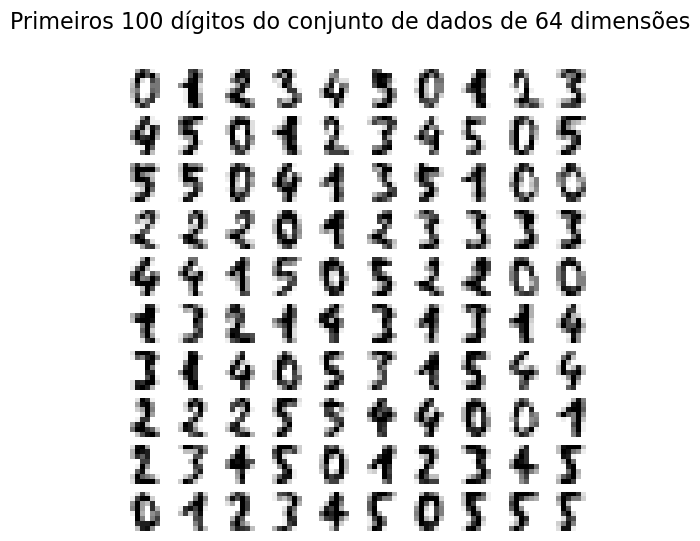

In [42]:
# Mostra os primeiros 100 dígitos do conjunto de dados
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("Primeiros 100 dígitos do conjunto de dados de 64 dimensões", fontsize=16)

In [43]:
# Define função para plotar os dados após aplicação do algoritmo
def plot_embedding(X, title):
    _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X)

    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        # plot every digit on the embedding
        # show an annotation box for a group of digits
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        imagebox.set(zorder=1)
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")

In [57]:
# Declara os algoritmos que irão operar sobre o conjunto de dados
# Nesse caso, apenas o Isomap
embeddings = {
    "Isomap embedding": Isomap(n_neighbors=n_neighbors, n_components=2),

}

In [58]:
# Calcula a projeção dos dados após a aplicação do algoritmo e o tempo de execução
# Nesse caso, apenas o Isomap
projections, timing = {}, {}
for name, transformer in embeddings.items():
    if name.startswith("Linear Discriminant Analysis"):
        data = X.copy()
        data.flat[:: X.shape[1] + 1] += 0.01  # Make X invertible
    else:
        data = X

    print(f"Computing {name}...")
    start_time = time()
    projections[name] = transformer.fit_transform(data, y)
    timing[name] = time() - start_time

Computing Isomap embedding...


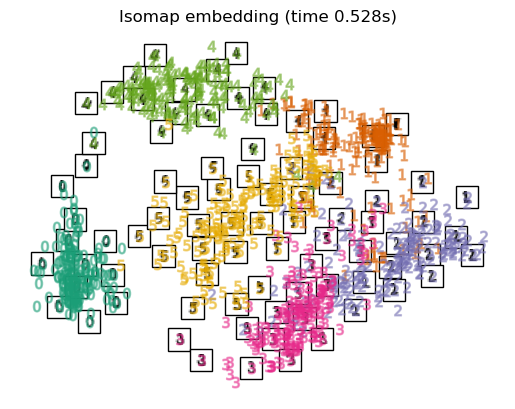

In [59]:
# Mostra os resultados
for name in timing:
    title = f"{name} (time {timing[name]:.3f}s)"
    plot_embedding(projections[name], title)

plt.show()